# NYC Neighborhood Spatial Boundaries  
Jonas

In [9]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt


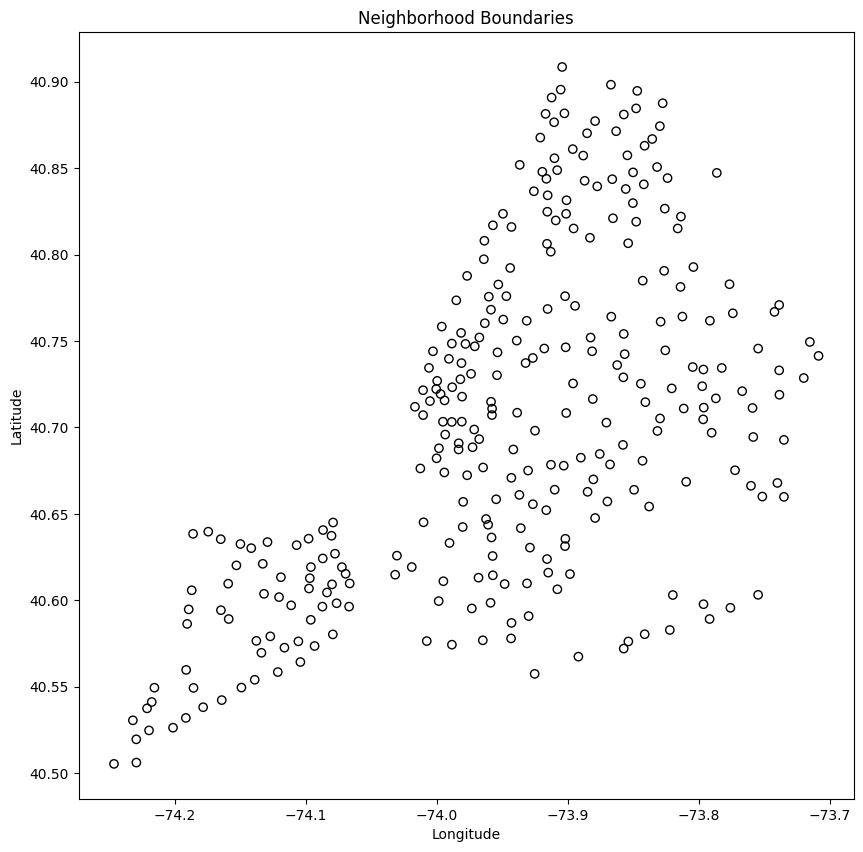

In [10]:
neighborhood = gpd.read_file('data/Neighborhood Names GIS.geojson')

fig, ax = plt.subplots(figsize=(10, 10))
neighborhood.plot(ax=ax, edgecolor="black", facecolor="none")  # Use facecolor="none" to show only boundaries
plt.title("Neighborhood Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [11]:
NTA_2020 = pd.read_csv('data/2020_NTA.csv')
neighborhood_name_gdf = gpd.read_file('data/Neighborhood Names GIS.geojson')
NTA_2020['geometry'] = NTA_2020['the_geom'].apply(wkt.loads)
NTA_2020 = gpd.GeoDataFrame(NTA_2020, geometry='geometry')


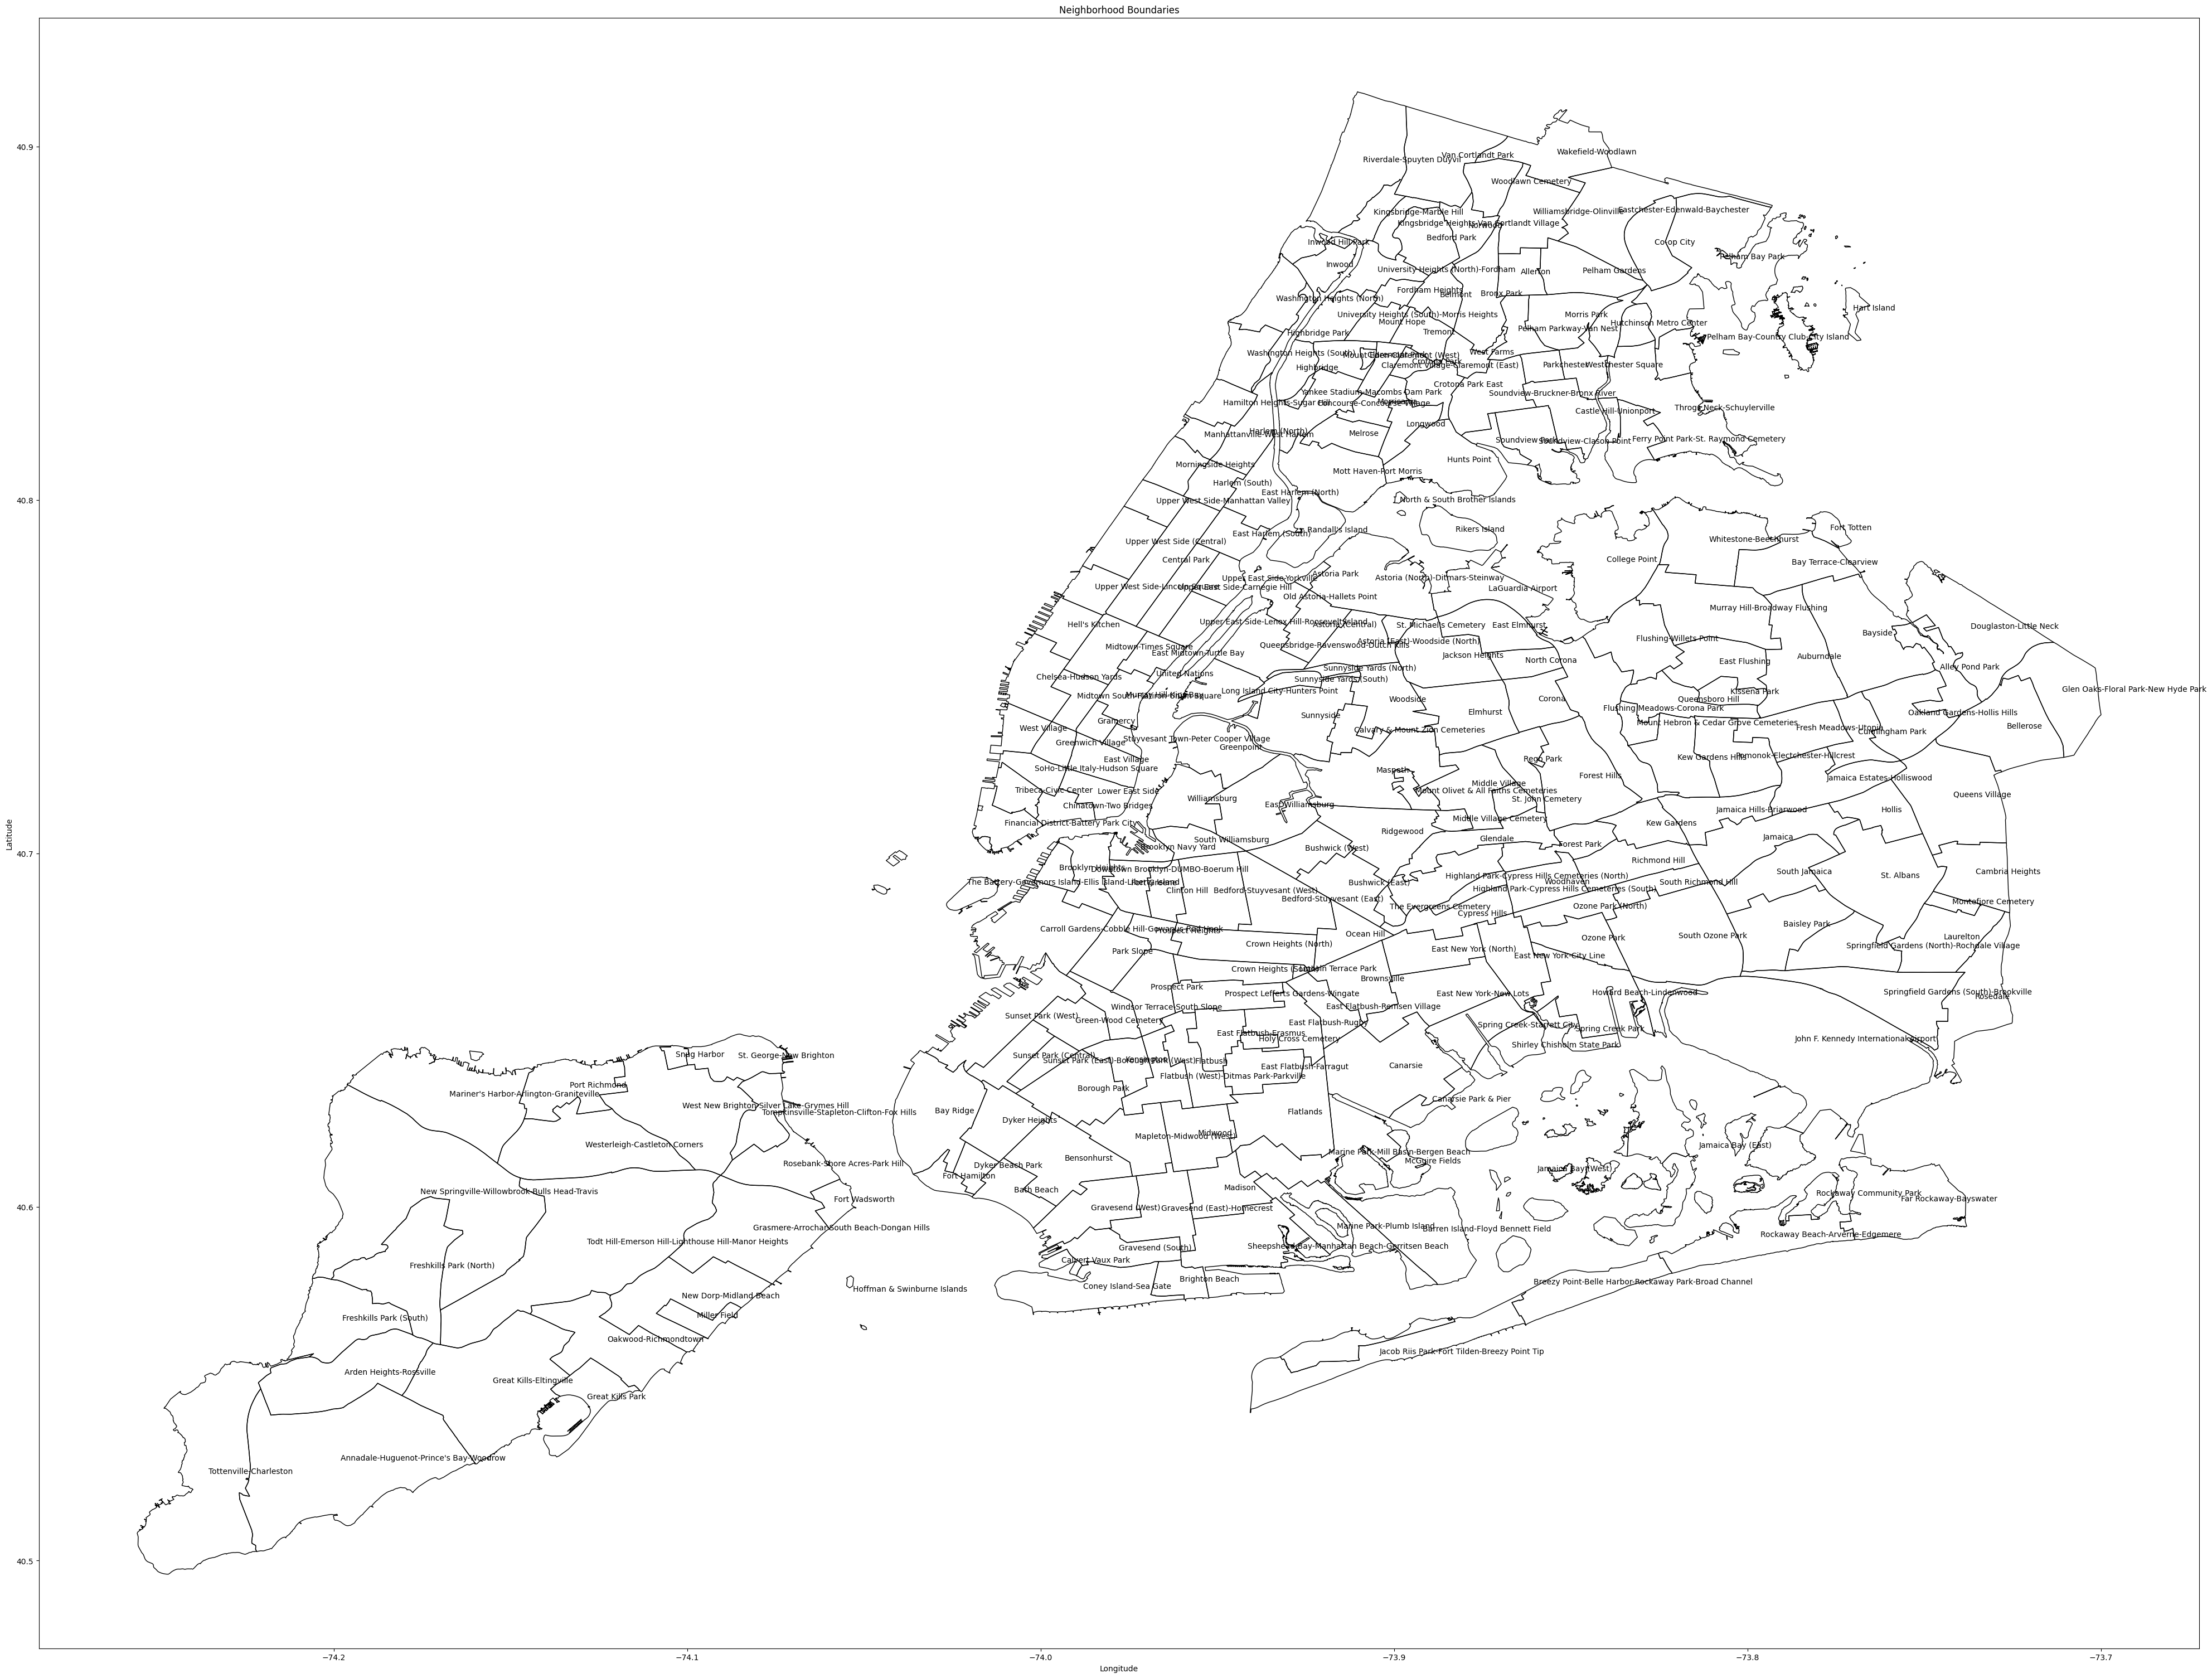

In [12]:
fig, ax = plt.subplots(figsize=(50, 50))
NTA_2020.plot(ax=ax, edgecolor="black", facecolor="none")  # Use facecolor="none" to show only boundaries
for idx, row in NTA_2020.iterrows():
    ax.annotate(row['NTAName'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), color='black')
plt.title("Neighborhood Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Matching Neighborhoods in Datasets

In [45]:
# Use fuzzy matching to match the neighborhood names
from fuzzywuzzy import process
from pprint import pprint
import re

def process_text(text):
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.upper()

def find_best_match(name, match_list):
    # replace the number and punctuations in names with spaces
    name = process_text(name)
    matches = [process_text(match) for match in match_list]
    match, score = process.extractOne(name, matches)
    return match, score

In [46]:
dof = pd.read_csv('./data/DOF_Summary_of_Neighborhood_Sales.csv')
zillow = pd.read_csv('./data/zillow_HVI_neighborhood.csv.gz', compression='gzip')
nta = pd.read_csv('./data/2020_NTA.csv')

In [55]:
# Extract the unique values and drop nas
dof_names = dof['NEIGHBORHOOD'].dropna().unique()
zillow_names = zillow['RegionName'].dropna().unique()
nta_names = nta['NTAName'].dropna().unique()


In [56]:
df_match_names = pd.DataFrame(data = nta_names, columns = ['nta_name'])

In [57]:
# Use find_best_match function to find the best match and the score
df_match_names['dof_match'], df_match_names['dof_score'] = zip(*df_match_names['nta_name'].apply(lambda x: find_best_match(x, dof_names)))

In [ ]:
match_dict['CASTLE HILL/UNIONPORT'] = 'CASTLE HILL'
match_dict['HARLEM-EAST'] = 'EAST HARLEM'
match_dict['FLATBUSH-EAST'] = 'EAST FLATBUSH'
match_dict['NEW BRIGHTON-ST. GEORGE'] = 'ST.GEORGE'
match_dict['NEW DORP-BEACH'] = 'NEW DORP BEACH'
match_dict['NEW DORP-HEIGHTS'] = 'NEW DORP'
match_dict['ROSSVILLE-CHARLESTON'] = 'CHARLESTON'
match_dict['ROSSVILLE-RICHMOND VALLEY'] = 'RICHMOND VALLEY'
match_dict['STAPLETON-CLIFTON'] = 'CLIFTON'
match_dict['WILLIAMSBURG-CENTRAL'] = 'WILLIAMSBURG'
match_dict['WILLIAMSBURG-NORTH'] = 'WILLIAMSBURG'
match_dict['WILLIAMSBURG-SOUTH'] = 'WILLIAMSBURG'
match_dict['KINGSBRIDGE/JEROME PARK'] = 'KINGSBRIDGE'
match_dict['MORRISANIA/LONGWOOD'] = 'LONGWOOD'
match_dict['MOTT HAVEN/PORT MORRIS'] = 'MOTT HAVEN'
match_dict['SCHUYLERVILLE/PELHAM BAY'] = 'PELHAM BAY'


# select those unmatched neighborhoods out of dof_names
unmatched = [name for name in dof_names if name not in match_dict.keys()]

for name in unmatched:
    if "-" in name:
        name_split = name.split("-")[0]
        if name_split in zillow_names:
            match_dict[name] = name_split

# Select those with - in the name
unmatched_sub = [name for name in dof_names if name not in match_dict.keys()]

pprint(unmatched_sub)

['AIRPORT LA GUARDIA',
 'ALPHABET CITY',
 'ARVERNE',
 'BATHGATE',
 'BEECHHURST',
 'BLOOMFIELD',
 'BREEZY POINT',
 'BRONX PARK',
 'BRONXDALE',
 'BROOKLYN-UNKNOWN',
 'BUSH TERMINAL',
 'CHINATOWN',
 'CLINTON',
 'CLOVE LAKES',
 'CO-OP CITY',
 'CONCORD',
 'CONCORD-FOX HILLS',
 'CROTONA PARK',
 'CYPRESS HILLS',
 'FASHION',
 'FIELDSTON',
 'FLATIRON',
 'FLUSHING MEADOW PARK',
 'FRESH KILLS',
 'HAMMELS',
 'HILLCREST',
 'HOLLIS HILLS',
 'HOLLISWOOD',
 'HUNTS POINT',
 'JAMAICA BAY',
 'JAVITS CENTER',
 'KINGSBRIDGE HTS/UNIV HTS',
 'KIPS BAY',
 'LITTLE NECK',
 'LIVINGSTON',
 'MADISON',
 'MANHATTAN VALLEY',
 'MANOR HEIGHTS',
 'MIDTOWN EAST',
 'MIDTOWN WEST',
 'MOUNT HOPE/MOUNT EDEN',
 'NAVY YARD',
 'OCEAN HILL',
 'OCEAN PARKWAY-NORTH',
 'OCEAN PARKWAY-SOUTH',
 'PARK SLOPE SOUTH',
 'PELHAM PARKWAY NORTH',
 'PELHAM PARKWAY SOUTH',
 'PORT IVORY',
 'QUEENS-UNKNOWN',
 'RICHMONDTOWN-LIGHTHS HILL',
 'SEAGATE',
 'SO. JAMAICA-BAISLEY PARK',
 'SOUTH JAMAICA',
 'SOUTHBRIDGE',
 'SPRING CREEK',
 'STATEN ISLAND-U

In [ ]:
# Create a mapping dataframe
mapping_df = pd.DataFrame(data=dof_names, columns=["DOF_Neighborhood"])
mapping_df["zillow_neighborhood"] = mapping_df["DOF_Neighborhood"].map(match_dict)

In [ ]:
nta_2020_df = pd.read_csv("./data/2020_NTA.csv")

In [ ]:
nta_names = nta_2020_df["NTAName"].unique()
nta_match_df = pd.DataFrame(data=nta_names, columns=["NTAName"])
nta_match_df['NTAName'] = nta_match_df['NTAName'].str.upper()

In [ ]:
nta_match_df[['dof_neighborhood', 'score']] = nta_match_df["NTAName"].apply(lambda x: pd.Series(find_best_match(x, dof_names)))